In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [87]:
df = pd.read_csv("2019_travel_speed_and_performance_measure-truck.csv")

In [9]:
# Changing settings to view all the attributes

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # this will print all the rows.

In [88]:
df.sample(10)

,FID,OGF_ID,LENGTH,EXITNUM,LANES,RDCLASS,ROUTENUM,SPDLIM,ROUTE_NAME,FULLNAME,DIRECTIONA,STREET_TYP,STREET_NAM,STREET_T_1,STREET_DIR,ORNICID,AZIMUTH,STATE,COUNTRY,ICID,FFS,ATS_AM,ATS_PM,ATS_WN,ATS_AM_ADJ,ATS_PM_ADJ,ATS_WN_ADJ,TTI_AM,TTI_PM,TTI_WN,TTI_AM_ADJ,TTI_PM_ADJ,TTI_WN_ADJ,DI_AM,DI_PM,DI_WN,DI_AM_ADJ,DI_PM_ADJ,DI_WN_ADJ,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,BTI_AM_ADJ,BTI_PM_ADJ,BTI_WN_ADJ,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
180316,180317,1500699621,858.337,,2,Arterial,0,60,,WOLF GROVE ROAD,,,Wolf Grove,Road,,-1500699621,246.021267,ON,Canada,-1500699621,0,63,41,0,63,41,0,0.00,0.00,0.00,,,,0,0,0,,,,16,8,0,3.94,5.12,0.00,> 2.00,> 2.00,,0,0,0,0,0,71,65,74,44,48,43,42,49,56,53,32,0,56,0,0,66,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.010111
177507,177508,4074632,107.230,,3,Arterial,0,50,,MARLEAU AVENUE,,,Marleau,Avenue,,-4074632,247.883915,ON,Canada,-4074632,0,23,16,1,23,16,1,0.00,0.00,0.00,,,,0,0,0,,,,4,3,1,5.75,5.33,1.00,> 2.00,> 2.00,1,0,0,0,0,51,16,18,26,30,34,12,5,16,29,18,16,29,21,30,40,39,13,0,0,0,0,0,0,27,0,0,0,1,4,3,4,1,0,0,0,0,0,0,0,0,5,0,0,0.001275
146419,146420,1500344077,352.351,,2,Collector,0,40,,GOSFORD BOULEVARD,,,Gosford,Boulevard,,-1500344077,188.488939,ON,Canada,-1500344077,0,0,0,6,0,0,6,0.00,0.00,0.00,,,,0,0,0,,,,0,0,2,0.00,0.00,3.00,,,> 2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0.003351
175011,175012,1509375887,462.531,,4,Arterial,0,50,,PALLADIUM DRIVE,,,Palladium,Drive,,-1509375887,245.061202,ON,Canada,-1509375887,41,38,40,37,38,40,37,1.08,1.02,1.11,1.08,1.02,1.11,7,2,9,7,2,9,10,19,23,3.80,2.11,1.61,> 2.00,> 2.00,1.61,37,58,0,41,38,40,39,35,43,47,37,31,48,31,58,50,32,0,39,0,0,42,58,0,0,0,0,35,41,40,35,40,33,35,43,0,0,0,0,0,0,0,0,0,45,0,0,0,0.005182
203060,203061,1500447466,134.189,,2,Local / Street,0,50,,EDWARD STREET,,,Edward,Street,,1500447466,5.224001,ON,Canada,1500447466,0,0,39,0,0,39,0,0.00,0.00,0.00,,,,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,0,0,0,0,0,0,0,0,0,0,34,26,26,18,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001210
114590,114591,1500711709,91.009,,2,Local / Street,0,50,,PETER STREET,,,Peter,Street,,-1500711709,134.658907,ON,Canada,-1500711709,0,0,0,0,0,0,0,0.00,0.00,0.00,,,,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000950
274783,274784,1510853035,136.473,,2,Collector,0,50,,TREELINE BOULEVARD,,,Treeline,Boulevard,,1510853035,55.037582,ON,Canada,1510853035,0,0,0,0,0,0,0,0.00,0.00,0.00,,,,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001489
44701,44702,1507349575,58.519,,3,Arterial,107,70,,BOVAIRD DRIVE EAST,,,Bovaird,Drive,East,1507349575,47.981530,ON,Canada,1507349575,47,36,42,41,36,42,41,1.31,1.12,1.15,1.31,1.12,1.15,23,9,11,23,9,11,9,32,27,4.00,1.31,1.52,> 2.00,1.31,1.52,47,49,53,53,55,41,46,55,33,40,42,42,50,46,40,45,43,38,40,40,42,42,45,44,46,49,56,58,66,0,57,39,47,26,45,44,63,40,51,46,45,41,0,0,0,42,0,44,0.000613
70647,70648,6167908,27.034,,1,Arterial,50,30,,WESTMOUNT ROAD NORTH,,,Westmount,Road,North,6167908,23.626592,ON,Canada,6167908,0,19,0,0,19,0,0,0.00,0.00,0.00,,,,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,0,0,0,0,0,0,0,0,19,0,0,0,14,0,21,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000263
243305,243306,1500651967,6.709,,2,Expressway / Highway,34,80,,HIGHWAY 34,,Highway,34,,,1500651967,35.678207,ON,Canada,1500651967,21,28,28,0,28,28,0,1.00,1.00,0.00,1,1,,0,0,0,,,,24,6,0,1.17,4.67,0.00,1.17,>

In [8]:
df['Same?'] = df['ATS_AM'] == df['ATS_AM_ADJ']
df['Same?'].value_counts()

True     287640
False         7
Name: Same?, dtype: int64

In [9]:
df['Same?'] = df['ATS_PM'] == df['ATS_PM_ADJ']
df['Same?'].value_counts()

True     287643
False         4
Name: Same?, dtype: int64

In [10]:
df['Same?'] = df['ATS_WN'] == df['ATS_WN_ADJ']
df['Same?'].value_counts()

True     287640
False         7
Name: Same?, dtype: int64

In [11]:
#Checking if OGF_ID is the same as ORNICID.

df['Same?'] = df['OGF_ID'] == df['ORNICID']
df['Same?'].value_counts()

True     159287
False    128360
Name: Same?, dtype: int64

In [12]:
#Checking if ICID is the same as ORNICID.

df['Same?'] = df['ICID'] == df['ORNICID']
df['Same?'].value_counts()

True    287647
Name: Same?, dtype: int64

In [89]:
# Checking all the columns in the dataset
df.columns

Index(['FID', 'OGF_ID', 'LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM',
       'SPDLIM', 'ROUTE_NAME', 'FULLNAME', 'DIRECTIONA', 'STREET_TYP',
       'STREET_NAM', 'STREET_T_1', 'STREET_DIR', 'ORNICID', 'AZIMUTH', 'STATE',
       'COUNTRY', 'ICID', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'ATS_AM_ADJ',
       'ATS_PM_ADJ', 'ATS_WN_ADJ', 'TTI_AM', 'TTI_PM', 'TTI_WN', 'TTI_AM_ADJ',
       'TTI_PM_ADJ', 'TTI_WN_ADJ', 'DI_AM', 'DI_PM', 'DI_WN', 'DI_AM_ADJ',
       'DI_PM_ADJ', 'DI_WN_ADJ', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
       'BTI_PM', 'BTI_WN', 'BTI_AM_ADJ', 'BTI_PM_ADJ', 'BTI_WN_ADJ',
       'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05',
       'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11',
       'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15', 'ATS_WD16', 'ATS_WD17',
       'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23',
       'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 'ATS_WN05'

In [90]:
# checking how many columns this dataset has

len(df.columns)

97

In [91]:
# Reducing the number of columns by removing unnecessary ones.

df1 = df[[  'LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM',
           'SPDLIM', 'ROUTE_NAME', 'FULLNAME', 'DIRECTIONA', 'STREET_TYP',
           'STREET_NAM', 'STREET_T_1', 'STREET_DIR', 'AZIMUTH', 'STATE',
           'COUNTRY', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 
           'TTI_AM', 'TTI_PM', 'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN', 
           'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
           'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05',
           'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11',
           'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15', 'ATS_WD16', 'ATS_WD17',
           'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23',
           'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 'ATS_WN05',
           'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09', 'ATS_WN10', 'ATS_WN11',
           'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15', 'ATS_WN16', 'ATS_WN17',
           'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23',
           'SHAPE_Length']]

In [92]:
# Only 81 columns left

len(df1.columns)

81

In [93]:
# Checking data type of each column

df1.dtypes

LENGTH          float64
EXITNUM          object
LANES             int64
RDCLASS          object
ROUTENUM          int64
SPDLIM            int64
ROUTE_NAME       object
FULLNAME         object
DIRECTIONA       object
STREET_TYP       object
STREET_NAM       object
STREET_T_1       object
STREET_DIR       object
AZIMUTH         float64
STATE            object
COUNTRY          object
FFS               int64
ATS_AM            int64
ATS_PM            int64
ATS_WN            int64
TTI_AM          float64
TTI_PM          float64
TTI_WN          float64
DI_AM             int64
DI_PM             int64
DI_WN             int64
P95TH_AM          int64
P95TH_PM          int64
P95TH_WN          int64
BTI_AM          float64
BTI_PM          float64
BTI_WN          float64
ATS_WD00          int64
ATS_WD01          int64
ATS_WD02          int64
ATS_WD03          int64
ATS_WD04          int64
ATS_WD05          int64
ATS_WD06          int64
ATS_WD07          int64
ATS_WD08          int64
ATS_WD09        

In [94]:
df1.sample(10)

,LENGTH,EXITNUM,LANES,RDCLASS,ROUTENUM,SPDLIM,ROUTE_NAME,FULLNAME,DIRECTIONA,STREET_TYP,STREET_NAM,STREET_T_1,STREET_DIR,AZIMUTH,STATE,COUNTRY,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
265094,622.628,,2,Arterial,535,80,,HIGHWAY 535,,,,,,24.468113,ON,Canada,0,0,0,44,0.00,0.00,0.00,0,0,0,0,0,12,0.00,0.00,3.67,0,0,0,0,0,0,0,0,0,0,5,0,68,0,4,0,0,0,0,0,0,0,0,0,0,0,0,45,11,0,0,0,0,0,0,8,0,0,0,0,0,80,0,0,5,0,0,0,0.005891
172654,213.048,,3,Arterial,0,50,,FRONT STREET WEST,,,Front,Street,West,255.489984,ON,Canada,12,10,1,13,1.20,12.00,1.00,60,3300,0,2,0,3,5.00,0.00,4.33,15,11,14,14,15,40,15,18,13,10,12,13,12,9,8,3,4,4,1,8,15,12,10,10,3,11,0,0,0,10,0,37,16,31,8,8,0,20,16,0,14,0,0,0,6,0,0,17,0.002570
72687,221.897,,2,Collector,0,40,,DUNCAN AVENUE NORTH,,,Duncan,Avenue,North,132.679243,ON,Canada,0,23,11,0,0.00,0.00,0.00,0,0,0,0,6,0,0.00,1.83,0.00,0,0,0,0,0,0,0,0,23,0,1,8,17,13,12,10,27,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002419
8258,1035.610,,2,Arterial,0,80,,STONEMILL ROAD,,,Stonemill,Road,,358.324742,ON,Canada,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.009325
34021,135.528,,2,Collector,0,40,,OLD LAKESHORE ROAD,,,,,,274.024384,ON,Canada,0,32,0,0,0.00,0.00,0.00,0,0,0,25,0,0,1.28,0.00,0.00,0,0,0,0,0,0,39,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001660
98389,90.045,,2,Arterial,7,50,,AILSA CRAIG MAIN STREET,,,Ailsa Craig Main,Street,,99.399515,ON,Canada,53,4,14,3,13.25,3.79,17.67,832,189,1132,1,7,0,4.00,2.00,0.00,0,0,0,0,0,0,14,18,5,8,16,14,7,3,15,26,24,35,33,35,35,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001095
40150,76.784,,2,Arterial,552,80,,HIGHWAY 552,,Highway,552,,,288.709943,ON,Canada,0,0,0,29,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,26,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000963
182309,1727.798,,2,Expressway / Highway,60,80,Algonquin Trail,HIGHWAY 60,,Highway,60,,,244.177002,ON,Canada,88,90,88,95,1.00,1.00,1.00,0,0,0,77,78,79,1.17,1.13,1.20,84,90,85,89,86,84,87,92,87,87,84,86,85,88,86,88,88,91,82,91,88,81,84,90,77,76,0,76,82,82,93,79,85,90,91,0,88,0,0,0,94,84,87,0,0,0,0,0,0.020129
183096,1928.202,,2,Arterial,0,50,,WALLBRIDGE LOYALIST ROAD,,,Wallbridge Loyalist,Road,,155.115871,ON,Canada,60,51,51,52,1.18,1.18,1.15,11,11,9,24,14,15,2.12,3.64,3.47,100,0,69,51,54,41,43,51,57,56,51,56,51,61,55,52,54,49,62,69,51,46,54,72,0,0,0,0,61,64,68,0,0,53,60,69,64,60,0,0,21,52,0,0,0,0,0,0,0.018146
254277,224.191,,2,Arterial,0,80,,KYDD ROAD,,,Kydd,Road,,338.313167,ON,Canada,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002057


In [95]:
# Checking the values of DIRCTIONA attribute.

df1.DIRECTIONA.values

array([' ', ' ', ' ', ..., ' ', ' ', ' '], dtype=object)

In [96]:
# above query I found out that it is a space, which is not useful, so I want to fine out how many of them like that.

df[df['DIRECTIONA'] == ' '].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            287637, 287638, 287639, 287640, 287641, 287642, 287643, 287644,
            287645, 287646],
           dtype='int64', length=285473)

In [97]:
a = df['DIRECTIONA'].unique()
print(sorted(a))

# as a result, I think I can get read of this column and the street_dir column and add them to the corresponding names, 
# as it is the continuation of the names of the street

[' ', 'East', 'North', 'South', 'West']


In [98]:
# Checking the unique values in the street_type attributes

a = df['STREET_TYP'].unique()
print(sorted(a))

[' ', 'Avenue', 'Boulevard', 'Chemin', 'Concession', 'Concession Road', 'County Road', 'Fire Route', 'Glen', 'Haven', 'Highway', 'Lake', 'Line', 'Parc', 'Parkway', 'Place', 'Promenade', 'Regional Road', 'Road', 'Route', 'Rue', 'Service', 'Shore', 'Sideline', 'Sideroad', 'Townline', 'Via']


In [99]:
# I found ot that many attributes contain spaces in the dataset, will be replacing them with Nan. 
# replacing all the spaces in the dataframe with Null 

df2 = df1.replace(r'^\s*$', np.nan, regex = True)

In [100]:
# checking how many rows has not null values
df2['STREET_TYP'].notnull().sum()

41532

In [101]:
df3 = df2.replace(' ', np.nan)

In [102]:
# checking for Unique values in EXITNUM column
# here I can see that in some cases, I have empty (space) fielded values.
df3.EXITNUM.unique()

array([nan, '153', '220', '213', '207', '214', '217', '224', '229', '231',
       '236', '344', '338', '113', '110', '241', '128', '129', '131A',
       '131', '135', '248', '27', '30', '41', '38', '232', '230', '222',
       '218', '216', '235', '244', '221', '219', '250', '36', '34', '351',
       '350', '352', '348', '21', '357', '120', '118', '75', '54', '53',
       '415', '412', '95', '98', '139', '29', '26', '73', '419', '418',
       '121', '126', '16', '306', '301', '294', '289', '282', '6', '238',
       '276', '270', '266', '261', '257', '77', '359', '21B', '355',
       '356', '354', '69', '63', '116', '123', '88', '90', '362', '20',
       '21A', '28', '107', '105', '102', '99', '100', '101', '1', '78',
       '74', '189', '186', '177', '177B', '177A', '324', '97', '93',
       '389', '86', '119', '109', '111', '383', '381', '117', '392',
       '390', '83', '122', '44', '12', '448', '440', '144', '142', '157',
       '149', '47', '401', '399', '397', '51', '49', '48', '55

In [103]:
df3.shape

(287647, 81)

In [104]:
# checking for missing values
# based on that information, I will higly concider to drop the EXITNUM too, as only 0.3% of the data has an EXITNUM
df3['EXITNUM'].isnull().sum()

286678

In [105]:
df3.FULLNAME.unique()

array(['ELORA STREET', 'ABSALOM STREET WEST', 'MURPHY DRIVE', ...,
       'WHEELER AVENUE', 'CHRISTIE DRIVE', 'HACIENDA ROAD'], dtype=object)

In [106]:
df3['COUNTRY'].unique()

array(['Canada'], dtype=object)

In [107]:
df3 = df3[['LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM',
       'ROUTE_NAME', 'FULLNAME', 'STREET_TYP', 'AZIMUTH',
       'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM', 'TTI_WN',
       'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
       'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03',
       'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
       'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15',
       'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21',
       'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03',
       'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
       'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15',
       'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21',
       'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

In [111]:
# I am checking for missing values in the dataset.
# As we can see here that EXITNUM, ROUTE_NAME, FULLNAME and STREET_TYP have missing values. Out of those 4,
# FULLNAME has the least, only 1043 (0.4%) of total rows.
# On the other hand, EXITNUM, ROUTE_NAME and STREET_TYP have a very high number of missing values. 
# They are 99.7%, 93.7% and 85.6% of total records respectively.

df3.isna().sum()

LENGTH               0
EXITNUM         286678
LANES                0
RDCLASS              0
ROUTENUM             0
SPDLIM               0
ROUTE_NAME      269404
FULLNAME          1043
STREET_TYP      246115
AZIMUTH              0
FFS                  0
ATS_AM               0
ATS_PM               0
ATS_WN               0
TTI_AM               0
TTI_PM               0
TTI_WN               0
DI_AM                0
DI_PM                0
DI_WN                0
P95TH_AM             0
P95TH_PM             0
P95TH_WN             0
BTI_AM               0
BTI_PM               0
BTI_WN               0
ATS_WD00             0
ATS_WD01             0
ATS_WD02             0
ATS_WD03             0
ATS_WD04             0
ATS_WD05             0
ATS_WD06             0
ATS_WD07             0
ATS_WD08             0
ATS_WD09             0
ATS_WD10             0
ATS_WD11             0
ATS_WD12             0
ATS_WD13             0
ATS_WD14             0
ATS_WD15             0
ATS_WD16             0
ATS_WD17   

In [108]:
df3.dtypes

LENGTH          float64
EXITNUM          object
LANES             int64
RDCLASS          object
ROUTENUM          int64
SPDLIM            int64
ROUTE_NAME       object
FULLNAME         object
STREET_TYP       object
AZIMUTH         float64
FFS               int64
ATS_AM            int64
ATS_PM            int64
ATS_WN            int64
TTI_AM          float64
TTI_PM          float64
TTI_WN          float64
DI_AM             int64
DI_PM             int64
DI_WN             int64
P95TH_AM          int64
P95TH_PM          int64
P95TH_WN          int64
BTI_AM          float64
BTI_PM          float64
BTI_WN          float64
ATS_WD00          int64
ATS_WD01          int64
ATS_WD02          int64
ATS_WD03          int64
ATS_WD04          int64
ATS_WD05          int64
ATS_WD06          int64
ATS_WD07          int64
ATS_WD08          int64
ATS_WD09          int64
ATS_WD10          int64
ATS_WD11          int64
ATS_WD12          int64
ATS_WD13          int64
ATS_WD14          int64
ATS_WD15        

In [109]:
df3.shape

(287647, 75)

In [113]:
# Checking for unique values in ROUTE_NAME
df3['ROUTE_NAME'].unique()

array([nan, 'Bluewater Route', 'Bluewater Veterans Highway',
       'Bluewater Highway', 'Talbot Trail', 'Algonquin Trail',
       'Wine Route', 'Trans-Canada Highway', 'Queen Elizabeth Way',
       'Great River Road', 'Voyageur Route', 'Frontier Route',
       'Route of Heroes', 'Taste Trail', 'Arts Trail',
       'African-Canadian Heritage Tour', 'Oil Heritage Route',
       'Deer Trail Route', 'Terry Fox Courage Highway',
       'Route Transcanadienne', 'Golden Highway', 'The Kingsway',
       'Lake Nipissing Circle Tour', 'Macdonald-Cartier Freeway',
       '407 ETR', 'Highway of Heroes', 'Don Valley Parkway',
       'Gardiner Expressway', 'Red Hill Valley Parkway', 'The Allen',
       'Highbury Avenue', 'Veterans Memorial Parkway',
       'Lincoln M. Alexander Parkway', 'John M Turner Memorial Highway',
       'General Brock Parkway', 'Hanlon Parkway', 'The Queensway',
       'Veterans Memorial Highway', 'E.C. Row Expressway',
       'Rt. Hon. Herb Gray Parkway', 'Falconbridge'], 

In [115]:
# Dropping EXITNUM, ROUTE_NAME and STREET_TYP

df4 = df3[['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM',
       'FULLNAME', 'AZIMUTH',
       'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM', 'TTI_WN',
       'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
       'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03',
       'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
       'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15',
       'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21',
       'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03',
       'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
       'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15',
       'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21',
       'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

In [117]:
df4.shape

(287647, 72)

In [118]:
df4.dtypes

LENGTH          float64
LANES             int64
RDCLASS          object
ROUTENUM          int64
SPDLIM            int64
FULLNAME         object
AZIMUTH         float64
FFS               int64
ATS_AM            int64
ATS_PM            int64
ATS_WN            int64
TTI_AM          float64
TTI_PM          float64
TTI_WN          float64
DI_AM             int64
DI_PM             int64
DI_WN             int64
P95TH_AM          int64
P95TH_PM          int64
P95TH_WN          int64
BTI_AM          float64
BTI_PM          float64
BTI_WN          float64
ATS_WD00          int64
ATS_WD01          int64
ATS_WD02          int64
ATS_WD03          int64
ATS_WD04          int64
ATS_WD05          int64
ATS_WD06          int64
ATS_WD07          int64
ATS_WD08          int64
ATS_WD09          int64
ATS_WD10          int64
ATS_WD11          int64
ATS_WD12          int64
ATS_WD13          int64
ATS_WD14          int64
ATS_WD15          int64
ATS_WD16          int64
ATS_WD17          int64
ATS_WD18        

In [120]:
# checking the dataset with describe funtction

# I can observe that maximum speeds are not valid by checking the outcome. 
# Because at many places Max speed is over 150, and reaching even 375, is unrealistic.


df4.describe()

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
count,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000
mean,450.148965,2.256151,35.132972,58.414675,187.212674,20.688458,25.020786,24.682023,21.514634,0.634196,0.656034,0.578699,29.398892,32.361690,29.801159,14.377703,14.185648,12.842647,1.493165,1.390026,0.908475,13.154853,12.680494,12.774209,13.463085,14.792033,16.980431,19.358717,21.514898,23.381443,24.843819,25.455962,25.633718,25.503447,25.320059,24.493675,23.023769,21.138604,19.002225,17.584564,16.662785,15.982614,15.371389,14.669286,14.033075,8.760244,7.548370,7.057435,6.858375,7.166013,7.898751,8.820123,9.775541,10.516108,10.623716,10.662159,10.433316,10.189948,9.755363,9.371101,8.816136,8.491658,8.056705,7.633673,7.391779,7.088654,6.526030,6.316287,5.658971,0.004922
std,854.362487,0.797824,218.118051,15.153852,101.616393,29.876022,28.661689,29.097813,29.765881,1.532762,1.597925,1.655194,172.834325,179.374374,197.031189,22.989158,23.345982,23.698775,2.479590,2.386141,1.909132,27.026246,26.792174,26.901153,27.422545,28.088261,28.882065,29.211606,28.976656,28.701570,28.881297,29.008673,29.087739,29.211050,29.317581,29.343089,29.341189,29.279996,28.976681,28.805293,28.638957,28.415831,28.097546,27.715785,27.470987,23.733541,22.596133,22.001784,21.752502,22.156032,22.957359,23.822558,24.726856,25.328612,25.334878,25.288190,25.015540,24.803991,24.490229,24.218349,23.736302,23.522937,23.069425,22.592467,22.381850,22.068221,21.326551,21.072267,20.192725,0.009586
min,3.112000,1.000000,0.000000,5.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
25%,84.675000,2.000000,0.000000,50.000000,89.814344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

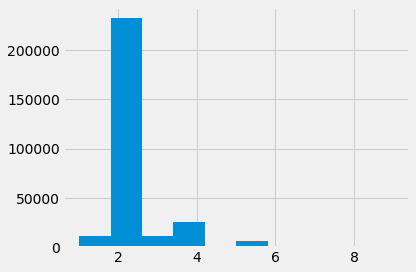

In [157]:
# This histogram shows that the highest number of lanes is 9. 
# Also, we can observe that Ontario trucks mainly travel on a two-lane road.
# Watching this histogram, I can assume that most travel speeds are not Highway speeds.

plt.style.use('fivethirtyeight')
plt.hist(df4.LANES)
plt.tight_layout()

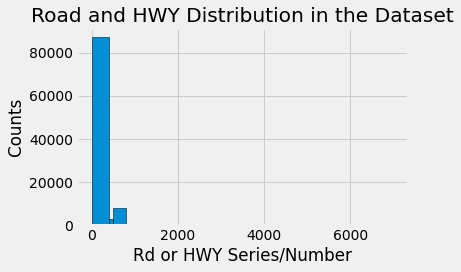

In [191]:
# Here I am plotting the histogram of the roads used by the trucks.
# When dividing them into the bins of the five different types of roads mainly used by truckers 
# (they are: King's Highway, 400-series highways, Secondary highways, Tertiary roads and 7000-series highways), 
# I can see that the 7000-series highway is the least used and the next least used road is 400-series highways 
# are the second least used by the trucks.

plt.style.use('fivethirtyeight')
bins = [2, 400, 500, 800, 7000]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title("Road and HWY Distribution in the Dataset")

plt.tight_layout()

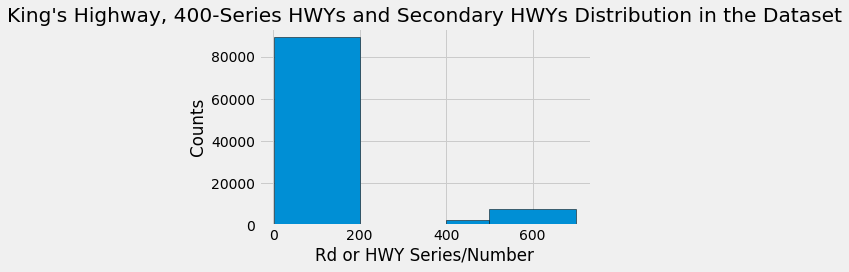

In [190]:
# Because the number of 7000-series highways is so insignificant in our data, 
# and there is no record of trucks driving on 800-series highways, 
# I removed those from the bin to see the data distribution for other routes.

plt.style.use('fivethirtyeight')
bins = [1, 200, 400, 500, 700]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title("King's Highway, 400-Series HWYs and Secondary HWYs Distribution in the Dataset")

plt.tight_layout()

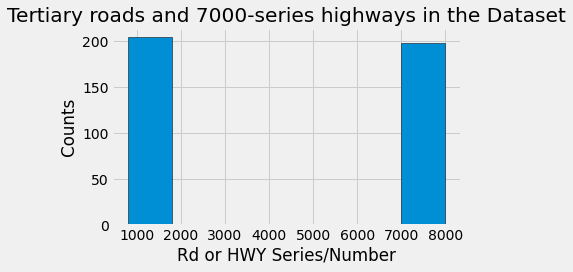

In [182]:
# Here I can see that there are around 200 datapoints showing for Tertiary roads and 7000-series highways.

plt.style.use('fivethirtyeight')
bins = [800, 1800, 7000, 8000]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title('Tertiary roads and 7000-series highways in the Dataset')

plt.tight_layout()

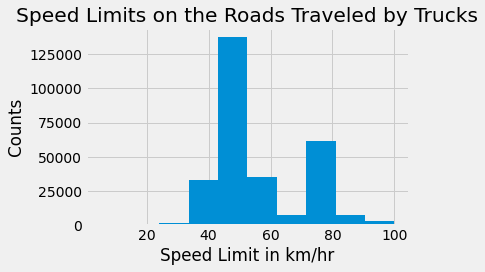

In [171]:
# The distribution of the road speed limit from this dataset 
# shows another picture by indicating that most of the dataset 
# is collected from the streets with lower speed limits (not a highway).

plt.style.use('fivethirtyeight')

plt.hist(df4.SPDLIM)

plt.xlabel('Speed Limit in km/hr')
plt.ylabel('Counts')
plt.title('Speed Limits on the Roads Traveled by Trucks')

plt.tight_layout()

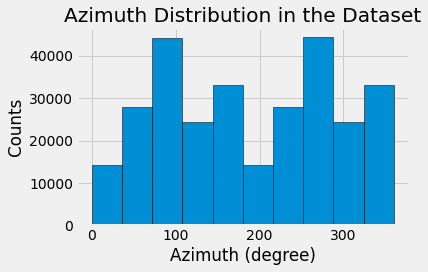

In [170]:
# When I plotted the histogram of the AZIMUTH where trucks travelled, it immediately reminded me 
# of the airport runway. Why is that? In an airport, runways are named or, more correctly to say numbered, 
# and sometimes the letter is added too, but we will not go there this time. I don't need that much information 
# to explain my point. So, the number on a runway is the heading of that runway and rounded to the nearest tenths, 
# and the tail is truncated. For example, if it says runway number 18, it means that this runway is directed 
# to the south at 180 degrees azimuth. Now, the catch is that the same runway is numbered differently from 
# the other side because if a plane landing from the other end will be heading to the north, azimuth (runway number) 
# will be 0. Now, coming back to my dataset and azimuth travelled by the trucks and illustrated in this histogram 
# shows me that if an X amount of trucks travelled to the 70-degree azimuth (highest bar on the histogram), 
# then almost the same X amount travelled 180 degrees opposite direction, 
# hence 250-degree azimuth (another spike of data). In a simple and brutal term, 
# I can assume that if the truck went somewhere, the truck returned from there.

plt.style.use('fivethirtyeight')

plt.hist(df4.AZIMUTH, bins=10, edgecolor = 'black')

plt.xlabel('Azimuth (degree)')
plt.ylabel('Counts')
plt.title('Azimuth Distribution in the Dataset')

plt.tight_layout()

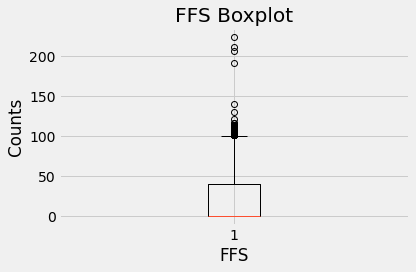

In [200]:
# By using Boxplot for FFS, I can see that everything above 100 or 110 km/hr is identified as outliers. 
# This is believable, as the truck will not be able to travel with speeds 150 or above.

plt.style.use('fivethirtyeight')

plt.boxplot([df4['FFS']])

plt.xlabel('FFS')
plt.ylabel('Counts')
plt.title('FFS Boxplot')

plt.tight_layout()

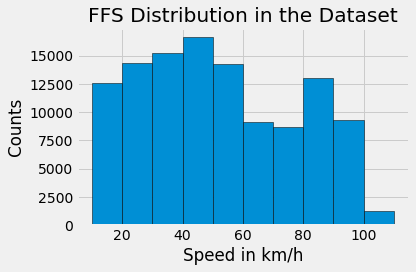

In [202]:
# By using the boxplot outcome and cutting away any speed above 110km/hr, 
# I can plot and see how distributed FFS is for my dataset.
# his illustration tells me that the majority of the FFS on the roads are below 80km/hr. 
# Especially data picks at 50km/hr, a free-flow speed for the town or city.

plt.style.use('fivethirtyeight')

bins = [10, 20, 30, 40, 50 , 60, 70, 80, 90, 100, 110]

plt.hist(df4.FFS, bins=bins, edgecolor = 'black')

plt.xlabel('Speed in km/h')
plt.ylabel('Counts')
plt.title('FFS Distribution in the Dataset')

plt.tight_layout()

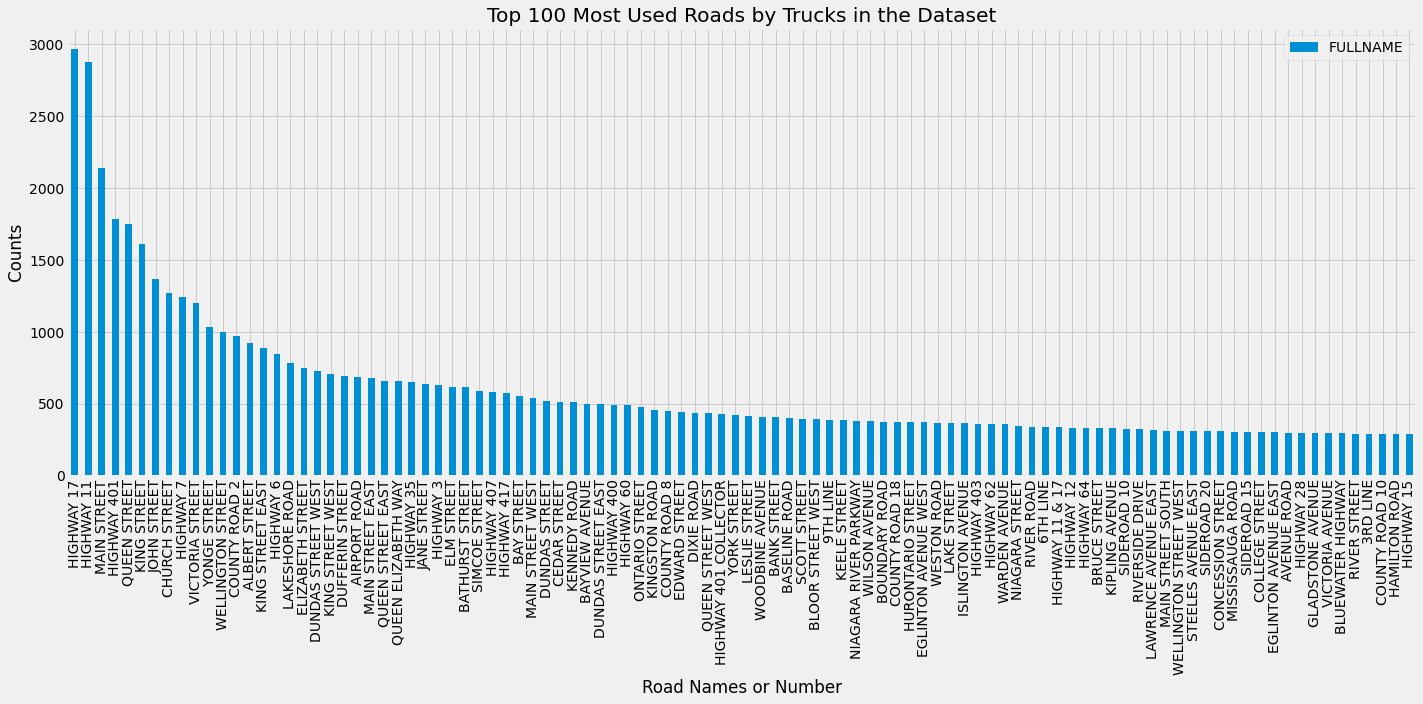

In [220]:
# By utilizing the bar chart, I am checking what roads were most used by the Trucks 
# (only the top 100 most used roads in the dataset). From the output, 
# I can say that the top HWY 401 is not in this dataset's top 3 used roads by trucks.

df_bar = pd.DataFrame(df4['FULLNAME'].value_counts())
df_bar = df_bar[:100]
df_bar.plot(kind='bar', figsize = (20,10))

plt.xlabel('Road Names or Number')
plt.ylabel('Counts')
plt.title('Top 100 Most Used Roads by Trucks in the Dataset')

plt.tight_layout()


In [222]:
# I want to create sub-datasets for visualization purposes to see how speed is affected 
# by the day of the week and the time of the day. I want to note that this is a 
# ruthless approach to the dataset and data. Later I plan and work to divide the data 
# to each road type and pick the average from the data points related to the same road 
# with the corresponding FFS and speed limits. Right now, I am mixing all together 
# (all the city/town roads with highways) and only spreading the data to weekdays, 
# weekends and times of the day.

df4_WD = df4[['ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 
              'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
              'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 
              'ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 
              'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23',]]

df4_WN = df4[['ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 
              'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
              'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 
              'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 
              'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23']]

In [224]:
df4_WD.sample(5)

,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23
84226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
287334,53,43,52,29,54,51,33,19,30,17,21,21,18,17,22,34,33,20,36,40,56,34,56,41
259573,0,0,21,0,0,0,0,0,27,0,23,0,26,0,0,19,0,0,14,0,0,0,0,0
247242,0,0,0,0,0,0,0,0,0,0,50,0,0,16,37,0,0,0,0,0,0,0,0,0
83233,0,0,0,38,35,0,0,34,48,43,40,54,42,38,46,41,39,45,0,0,0,0,0,40


In [225]:
df4_WN.sample(5)

,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23
53682,0,0,0,0,0,0,0,0,0,0,0,0,10,13,0,0,0,0,0,0,0,23,0,0
242845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0
3488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
159745,0,69,71,79,0,0,0,0,0,0,66,76,0,0,0,0,0,82,0,0,85,0,92,0


In [229]:
# I can see many zeros in my sub_datasets, and some go for all the columns. 
# To plot those and get meaningful data, I need to remove those zeros from my sub_dataset.

# Removing rows where all the columns are 0 (zero)

df4_WN_1 = df4_WN.replace(0, np.nan)
df4_WN_1 = df4_WN_1.dropna(how='all', axis=0)
df4_WN_1 = df4_WN_1.replace(np.nan, 0)


df4_WD_1 = df4_WD.replace(0, np.nan)
df4_WD_1 = df4_WD_1.dropna(how='all', axis=0)
df4_WD_1 = df4_WD_1.replace(np.nan, 0)

In [230]:
# I will average the data from both sub_dataset and save it for further plotting.

df4_WD_mean = df4_WN_1.mean().round(2)
df4_WN_mean = df4_WD_1.mean().round(2)

In [231]:
# Checking the mean values for the Week day (WD)

df4_WD_mean

ATS_WN00    18.81
ATS_WN01    16.21
ATS_WN02    15.16
ATS_WN03    14.73
ATS_WN04    15.39
ATS_WN05    16.96
ATS_WN06    18.94
ATS_WN07    20.99
ATS_WN08    22.58
ATS_WN09    22.81
ATS_WN10    22.90
ATS_WN11    22.40
ATS_WN12    21.88
ATS_WN13    20.95
ATS_WN14    20.12
ATS_WN15    18.93
ATS_WN16    18.24
ATS_WN17    17.30
ATS_WN18    16.39
ATS_WN19    15.87
ATS_WN20    15.22
ATS_WN21    14.01
ATS_WN22    13.56
ATS_WN23    12.15
dtype: float64

In [232]:
# Checking the mean values for the Weekend (WN)

df4_WN_mean

ATS_WD00    15.88
ATS_WD01    15.31
ATS_WD02    15.42
ATS_WD03    16.26
ATS_WD04    17.86
ATS_WD05    20.50
ATS_WD06    23.38
ATS_WD07    25.98
ATS_WD08    28.23
ATS_WD09    30.00
ATS_WD10    30.74
ATS_WD11    30.95
ATS_WD12    30.80
ATS_WD13    30.57
ATS_WD14    29.58
ATS_WD15    27.80
ATS_WD16    25.53
ATS_WD17    22.95
ATS_WD18    21.23
ATS_WD19    20.12
ATS_WD20    19.30
ATS_WD21    18.56
ATS_WD22    17.71
ATS_WD23    16.95
dtype: float64

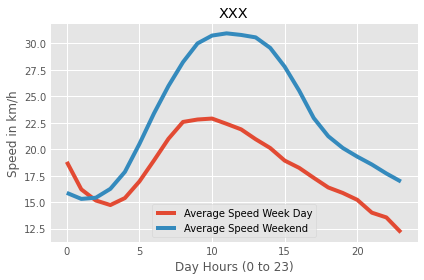

In [234]:
# You can see what I see that an average of everything - make a disastrous plot. 
# I will leave this lousy plot here to show my thinking pattern, and I will not finish with this bad plot now. 
# I will show below how I wanted to see the data description (how it was in my head) only for one data point.

plt.style.use('ggplot')

plt.plot(df4_WD_mean.values, label = 'Average Speed Week Day', )
plt.plot(df4_WN_mean.values, label = 'Average Speed Weekend')

plt.xlabel('Day Hours (0 to 23)')
plt.ylabel('Speed in km/h')
plt.title('Average of everything - make a disastrous plot')

plt.legend()

plt.grid(True)
plt.tight_layout()

In [235]:
# I am collecting all the Red Hill Valley Parkway into one place where RDCLASS is equal to Freeway 
# as Red Hill Valley Parkway also has a ramp speed which will influence our average. 
# I am turning the data into the NumPy series using the code below.

RED_HILL_VALLEY_PARKWAY_FRWY = df4.loc[df4['FULLNAME'] 
                                             == 'RED HILL VALLEY PARKWAY'].loc[df4['RDCLASS'] == 'Freeway'].mean().round(2)
RED_HILL_VALLEY_PARKWAY_FRWY

C:\Users\ilyas\AppData\Local\Temp\ipykernel_36912\3175152138.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  == 'RED HILL VALLEY PARKWAY'].loc[df4['RDCLASS'] == 'Freeway'].mean().round(2)


LENGTH          697.51
LANES             2.42
ROUTENUM          0.00
SPDLIM           90.00
AZIMUTH         146.42
FFS              83.75
ATS_AM           72.83
ATS_PM           63.42
ATS_WN           82.96
TTI_AM            1.16
TTI_PM            1.52
TTI_WN            1.02
DI_AM             6.88
DI_PM            22.58
DI_WN             0.88
P95TH_AM         49.50
P95TH_PM         42.67
P95TH_WN         69.50
BTI_AM            1.60
BTI_PM            1.80
BTI_WN            1.20
ATS_WD00         83.96
ATS_WD01         83.88
ATS_WD02         83.25
ATS_WD03         82.67
ATS_WD04         81.92
ATS_WD05         81.33
ATS_WD06         78.38
ATS_WD07         74.21
ATS_WD08         69.83
ATS_WD09         75.17
ATS_WD10         78.88
ATS_WD11         80.25
ATS_WD12         81.00
ATS_WD13         81.62
ATS_WD14         79.71
ATS_WD15         67.33
ATS_WD16         63.00
ATS_WD17         60.88
ATS_WD18         70.75
ATS_WD19         81.46
ATS_WD20         82.21
ATS_WD21         82.67
ATS_WD22   

In [238]:
# Average speed for Weekday hours (0 means midnight and 23 is 11pm)
ATS_WD_Hours = RED_HILL_VALLEY_PARKWAY_FRWY[21:45]
ATS_WD_Hours

ATS_WD00    83.96
ATS_WD01    83.88
ATS_WD02    83.25
ATS_WD03    82.67
ATS_WD04    81.92
ATS_WD05    81.33
ATS_WD06    78.38
ATS_WD07    74.21
ATS_WD08    69.83
ATS_WD09    75.17
ATS_WD10    78.88
ATS_WD11    80.25
ATS_WD12    81.00
ATS_WD13    81.62
ATS_WD14    79.71
ATS_WD15    67.33
ATS_WD16    63.00
ATS_WD17    60.88
ATS_WD18    70.75
ATS_WD19    81.46
ATS_WD20    82.21
ATS_WD21    82.67
ATS_WD22    83.67
ATS_WD23    85.71
dtype: float64

In [241]:
# Average speed for Weekend hours (0 means midnight and 23 is 11pm)
ATS_WN_Hours = RED_HILL_VALLEY_PARKWAY_FRWY[45:69]
ATS_WN_Hours

ATS_WN00    84.58
ATS_WN01    84.58
ATS_WN02    80.46
ATS_WN03    80.12
ATS_WN04    82.38
ATS_WN05    83.50
ATS_WN06    85.71
ATS_WN07    85.67
ATS_WN08    86.04
ATS_WN09    85.88
ATS_WN10    83.75
ATS_WN11    82.12
ATS_WN12    79.04
ATS_WN13    81.38
ATS_WN14    80.08
ATS_WN15    80.46
ATS_WN16    82.54
ATS_WN17    83.12
ATS_WN18    84.75
ATS_WN19    85.71
ATS_WN20    84.00
ATS_WN21    83.46
ATS_WN22    83.62
ATS_WN23    82.50
dtype: float64

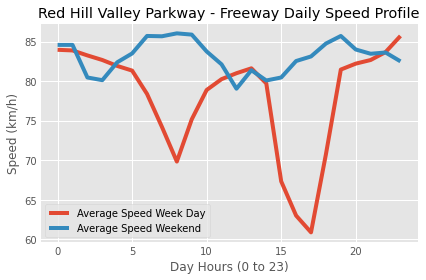

In [242]:
# This is not the final plot, will further develop my idea.

plt.style.use('ggplot')

plt.plot(ATS_WD_Hours.values, label = 'Average Speed Week Day', )
plt.plot(ATS_WN_Hours.values, label = 'Average Speed Weekend')

plt.xlabel('Day Hours (0 to 23)')
plt.ylabel('Speed (km/h)')
plt.title('Red Hill Valley Parkway - Freeway Daily Speed Profile')

plt.legend()

plt.tight_layout()

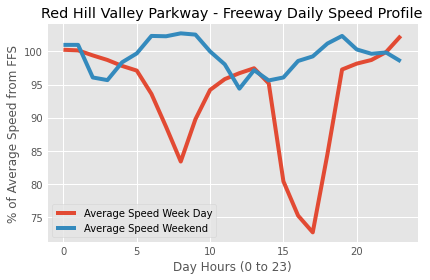

In [246]:
# By bringing the speed percentage in relation to the FFS (free-flow speed) of a given link or road, 
# I can start plotting all the other roads or highways into the same plot. The difference in speed 
# or actual FSS value will not throw my plot away into the nonsense zone because I will be plotting 
# a relationship and not actual speed values.

plt.style.use('ggplot')

plt.plot(((ATS_WD_Hours.values / RED_HILL_VALLEY_PARKWAY_FRWY['FFS']) * 100).round(2), label = 'Average Speed Week Day')
plt.plot(((ATS_WN_Hours.values / RED_HILL_VALLEY_PARKWAY_FRWY['FFS']) * 100).round(2), label = 'Average Speed Weekend')

plt.xlabel('Day Hours (0 to 23)')
plt.ylabel('% of Average Speed from FFS')
plt.title('Red Hill Valley Parkway - Freeway Daily Speed Profile')

plt.legend()

plt.tight_layout()